In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [18]:
data = {'Name':['Paper A', 'Paper B'],
     'Total circ':[1000000, 800000],
      'US circ':[500000, 200000],
      'CA':[100000, 100000]
     }

In [24]:
df = pd.DataFrame.from_dict(data)
df

Name  Total circ  US circ      CA
0  Paper A     1000000   500000  100000
1  Paper B      800000   200000  100000

In [25]:
df['not CA'] = df['US circ'] - df['CA']
df

Name  Total circ  US circ      CA  not CA
0  Paper A     1000000   500000  100000  400000
1  Paper B      800000   200000  100000  100000

In [26]:
df['not US'] = df['Total circ'] - df['US circ']
df

Name  Total circ  US circ      CA  not CA  not US
0  Paper A     1000000   500000  100000  400000  500000
1  Paper B      800000   200000  100000  100000  600000

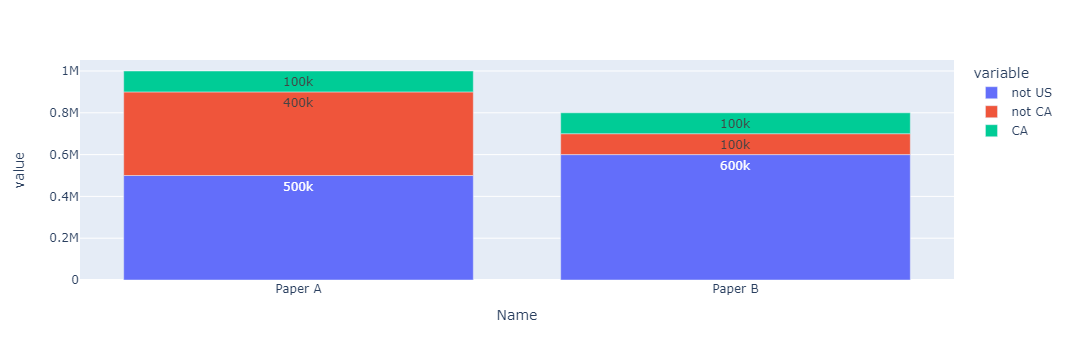

In [34]:
fig = px.bar(df, x='Name', y=['not US', 'not CA', 'CA'], text_auto=True)
fig.show()

# Publishers

In [257]:
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_excel('Publishers.xlsx',sheet_name='Publisher-FF-pastevalues',header=1)
df.head(3)

Name  Rank FF  FF Pubs  Rank WW  Worldwide  rank percentage  \
0         Elsevier        1   268538        1    3635613               64   
1  Springer Nature        2   180928        2    2987490               70   
2            Wiley        3   129068        3    1336084               50   

   percentage    All OA   Bronze   Closed     Gold    Green   Hybrid  \
0    7.386320  188871.0  66055.0  79667.0  27312.0  74488.0  21016.0   
1    6.056188  130336.0   9633.0  50592.0  63804.0  46542.0  10357.0   
2    9.660171   87654.0  22546.0  41414.0  12841.0  44009.0   8258.0   

        Sum  Delta  % OSTP closed  Rank % closed  
0  268538.0    0.0      29.666937           58.0  
1  180928.0    0.0      27.962504           63.0  
2  129068.0    0.0      32.086962           54.0

In [247]:
data = {'Name':['Els','SN','Wiley'],
    'worldwide':[3635650, 2987703,1336100],
      'US Fed Funded Publications':[222992,149928,109163]
     }
df2 = pd.DataFrame.from_dict(data)
df2

Name  worldwide  US Fed Funded Publications
0    Els    3635650                      222992
1     SN    2987703                      149928
2  Wiley    1336100                      109163

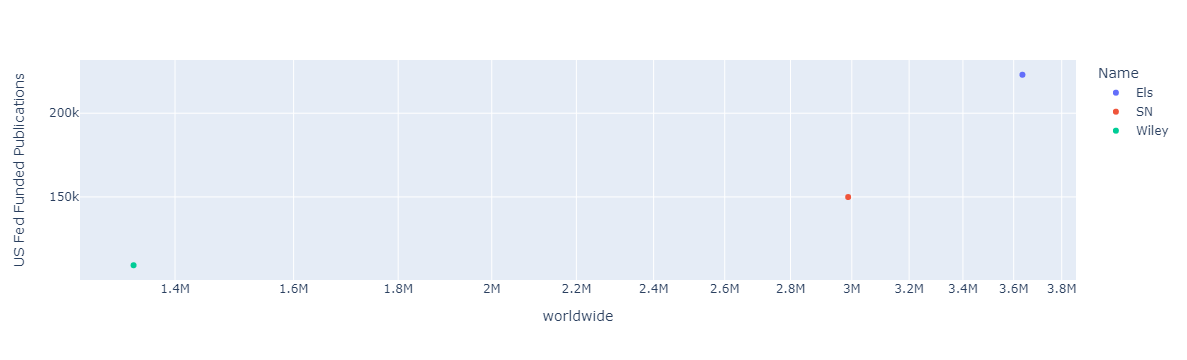

In [248]:
#filt  = df['Rank FF'].between(0,16)
fig = px.scatter(df2, x='worldwide',y='US Fed Funded Publications',
                 color='Name',
                log_x='True', 
                 trendline='ols' #,text='Name'
                )
fig.show()

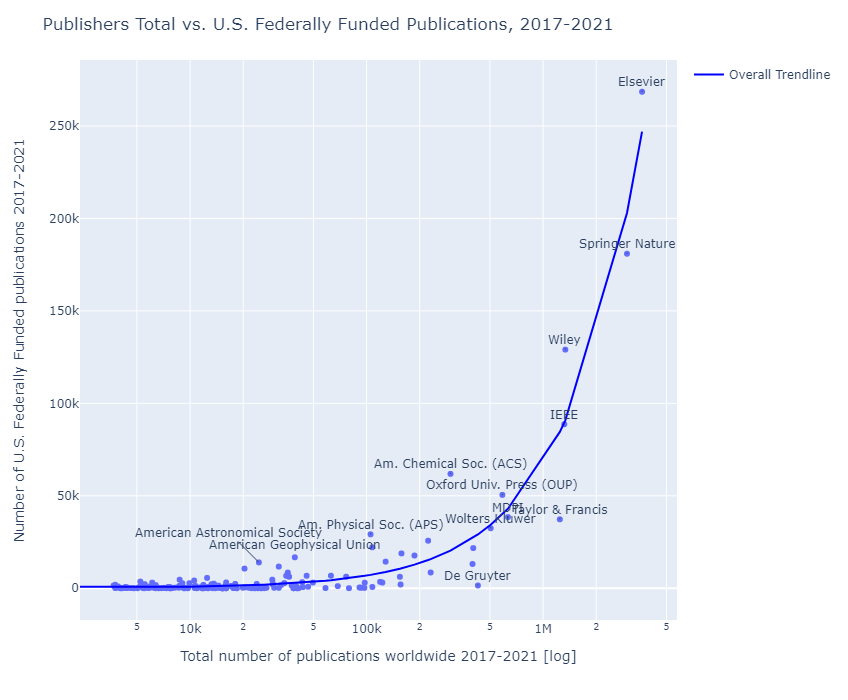

0.9313416543933457

In [3]:
#filt  = df['Rank FF'].between(0,16)
fig = px.scatter(df, x='Worldwide',y='FF Pubs',# symbol='Name', color='Name',
                 #symbol='Name',
                 log_x='True', 
                 hover_data=['Name'], 
                 trendline='ols',
                 trendline_scope='overall',
                 trendline_color_override='blue',
                 #text='Name'
                )

fig.update_traces(textposition='top center')

fig.update_layout(
    height=700, width=1200,
    title_text='Publishers Total vs. U.S. Federally Funded Publications, 2017-2021',
    xaxis_title = 'Total number of publications worldwide 2017-2021 [log]',
    yaxis_title = 'Number of U.S. Federally Funded publications 2017-2021'
)

# fig.data[0].text = [e if (e=='Elsevier' or e=='Wiley' or e=='Springer Nature' or e=='IEEE' or e=='SAGE' or e=='CUP'
#                          or e=='ACS' or e=='OUP' or e=='MDPI' or e=='T&F'
#                          or e=='APS' or e=='AGU' or e=='Frontiers' or e=='Am. Astronomical Soc.' or e=='De Gruyter'
#                          )
#                     else '' for e in fig.data[0].text]

df2 = df[ (df['FF Pubs'] > 29180) | (df['Worldwide']>427000) ]
num_rows = df2.shape[0]
for i in range(num_rows):
    fig.add_annotation(x=np.log10(df2['Worldwide']).iloc[i],
                       y=df2["FF Pubs"].iloc[i],
                       text = df2["Name"].iloc[i],
                       # showarrow = True,
                        ax = 0,
                        ay = -10
                      )

fig.add_annotation(x=4.593, y=23500,
            text="American Geophysical Union",
            showarrow=False,
            arrowhead=0)

fig.add_annotation(x=4.39, y=14000,
            text="American Astronomical Society",
            showarrow=True,
            arrowhead=0,
            ax = -30,
            ay = -30)


fig.show()

px.get_trendline_results(fig).px_fit_results.iloc[0].rsquared



In [4]:
fig.write_html("publishers_total_vs_FF.html", full_html=False, include_plotlyjs="cdn")

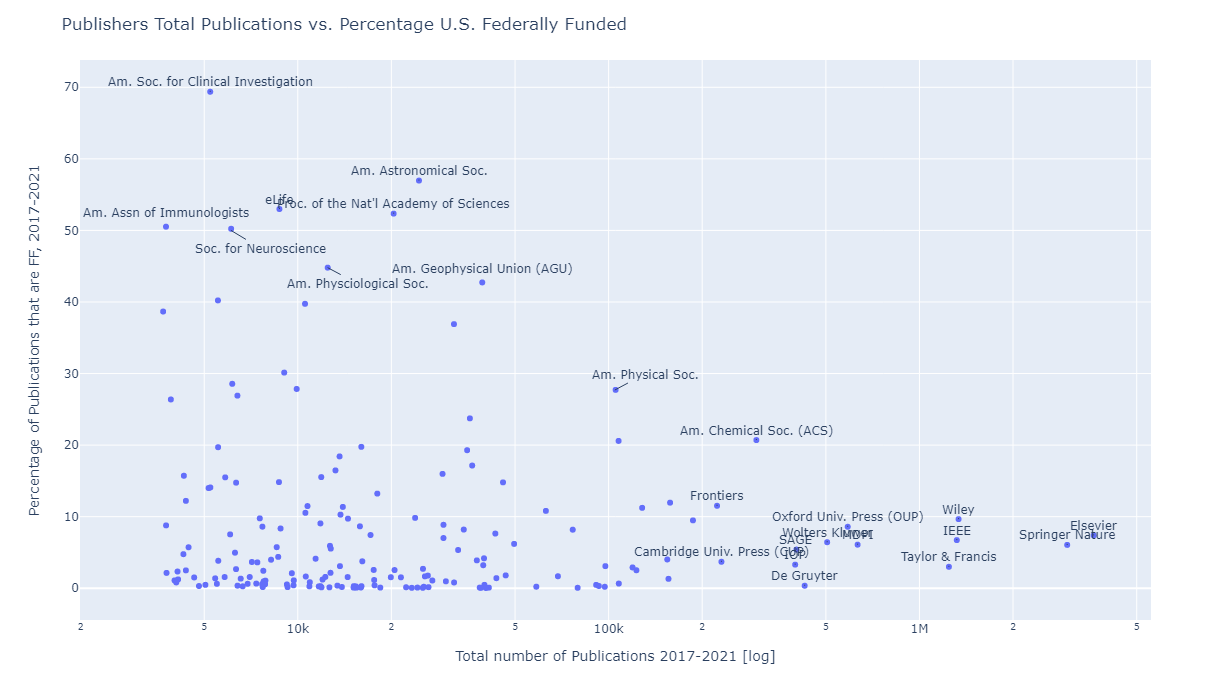

In [9]:
df = pd.read_excel('Publishers.xlsx',sheet_name='Publisher-FF-pastevalues',header=1)

#filt  = df['Rank FF'].between(0,16)
fig = px.scatter(df, x='Worldwide',y='percentage',# symbol='Name', color='Name',
                 #symbol='Name', 
                 hover_data=['Name'], 
                 #text='Name',
                 log_x='True',
                )
#change X to worldwide
#worldwide
#US Fed Funded Publications

fig.update_traces(textposition='top center')

fig.update_layout(
    height=700, width=1200,
    title_text='Publishers Total Publications vs. Percentage U.S. Federally Funded',
    xaxis_title = 'Total number of Publications 2017-2021 [log]',
    yaxis_title = "Percentage of Publications that are FF, 2017-2021"
)

df2 = df[ (df['percentage'] > 51) | (df['Worldwide']>200000) ]
num_rows = df2.shape[0]
for i in range(num_rows):
    fig.add_annotation(x=np.log10(df2['Worldwide']).iloc[i],
                       y=df2["percentage"].iloc[i],
                       text = df2["Name"].iloc[i],
                       # showarrow = True,
                        ax = 0,
                        ay = -10
                      )

fig.add_annotation(x=3.576, y=52.5,
            text="Am. Assn of Immunologists",
            showarrow=False,
            arrowhead=0)


fig.add_annotation(x=3.785, y=50,
            text="Soc. for Neuroscience",
            showarrow=True,
            arrowhead=0,
                  ax=30,
                  ay=18)

fig.add_annotation(x=4.593, y=44.7,
            text="Am. Geophysical Union (AGU)",
            showarrow=False,
            arrowhead=0)

fig.add_annotation(x=4.096, y=44.8,
            text="Am. Physciological Soc.",
            showarrow=True,
            arrowhead=0,
                  ax=30,ay=16)

fig.add_annotation(x=5.02, y=27.7,
            text="Am. Physical Soc.",
            showarrow=True,
            arrowhead=0,
                  ax=30,ay=-16)


fig.show()

In [399]:
df2.shape[0]

4

# Journal Titles

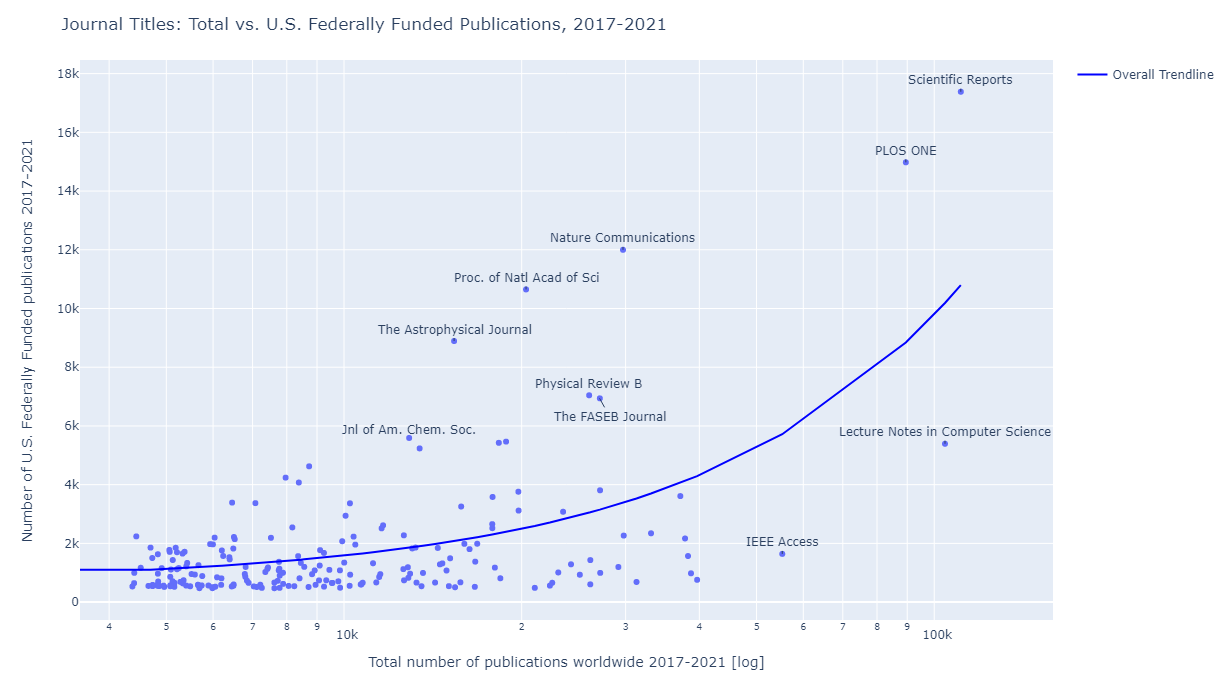

In [45]:
df = pd.read_excel('Journal_titles.xlsx',sheet_name='Journal_titles_FF_pastevalues',header=1)

fig = px.scatter(df, x='Worldwide',y='FF Pubs',# symbol='Name', color='Name',
                 #symbol='Name',
                 log_x='True', 
                 hover_data=['Name'], 
                 trendline='ols',
                 trendline_scope='overall',
                 trendline_color_override='blue',
                 #text='Name'
                )

fig.update_traces(textposition='top center')

fig.update_layout(
    height=700, width=1200,
    title_text='Journal Titles: Total vs. U.S. Federally Funded Publications, 2017-2021',
    xaxis_title = 'Total number of publications worldwide 2017-2021 [log]',
    yaxis_title = 'Number of U.S. Federally Funded publications 2017-2021'
)


df2 = df[ (df['FF Pubs'] > 8000) | (df['Worldwide']>52000) ]
num_rows = df2.shape[0]
for i in range(num_rows):
    fig.add_annotation(x=np.log10(df2['Worldwide']).iloc[i],
                       y=df2["FF Pubs"].iloc[i],
                       text = df2["Name"].iloc[i],
                       # showarrow = True,
                        ax = 0,
                        ay = -12
                      )
    
# fig.data[0].text = [e if (e=='Elsevier' or e=='Wiley' or e=='Springer Nature' or e=='IEEE' or e=='SAGE' or e=='CUP'
#                          or e=='ACS' or e=='OUP' or e=='MDPI' or e=='T&F'
#                          or e=='APS' or e=='AGU' or e=='Frontiers' or e=='Am. Astronomical Soc.' or e=='De Gruyter'
#                          )
#                     else 1]

fig.add_annotation(x=4.415, y=7444,
            text="Physical Review B",
            showarrow=False,
            arrowhead=0)
fig.add_annotation(x=4.433, y=6940,
            text="The FASEB Journal",
            showarrow=True,
            arrowhead=0,
                  ay=18,
                  ax=10)
fig.add_annotation(x=4.11, y=5891,
            text="Jnl of Am. Chem. Soc.",
            showarrow=False,
            arrowhead=0)
# fig.add_annotation(x=4.35, y=4102,
#             text="Physical Review D",
#             showarrow=False,
#             arrowhead=0)
# fig.add_annotation(x=3.9, y=4107,
#             text="Geophysical Research Letters",
#             showarrow=False,
#             arrowhead=0)

fig.show()

In [487]:
df2

ID                                               Name  Rank FF  \
0    jour.1045337                                 Scientific Reports        1   
1    jour.1037553                                           PLOS ONE        2   
2    jour.1043282                              Nature Communications        3   
3    jour.1082971                                               PNAS        4   
4    jour.1134140                          The Astrophysical Journal        5   
5    jour.1017429                                  The FASEB Journal        6   
6    jour.1320488                                  Physical Review B        7   
7    jour.1222150                  Lecture Notes in Computer Science        8   
8    jour.1022968  Monthly Notices of the Royal Astronomical Society        9   
9    jour.1320496                                  Physical Review D       10   
10   jour.1081898           Journal of the American Chemical Society       11   
11   jour.1018277                            Physical Review Letters       12   
58   jour.1050631                                        IEEE Access       59   
403  jour.1043366               Journal of Physics Conference Series      404   

     FF Pubs  Rank Worldwide  Worldwide Pubs  Rank percentage  Percentage  \
0      14026             2.0        110931.0             74.0   12.643896   
1      12120             4.0         89518.0             70.0   13.539176   
2       8350            15.0         29697.0             21.0   28.117318   
3       7317            30.0         20344.0              5.0   35.966378   
4       6783            48.0         15364.0              3.0   44.148659   
5       5901            19.0         27130.0             37.0   21.750829   
6       5470            22.0         26024.0             38.0   21.019059   
7       4753             3.0        104293.0            182.0    4.557353   
8       4414            35.0         18292.0             28.0   24.130768   
9       4337            33.0         18818.0             31.0   23.047083   
10      4202            62.0         12894.0              7.0   32.588801   
11      4000            57.0         13432.0             12.0   29.779631   
58      1522             5.0         55277.0            199.0    2.753406   
403      453             1.0        111165.0            209.0    0.407502   

      All OA  Bronze  Closed     Gold   Green  Hybrid      Sum  delta  \
0    14026.0     0.0     0.0  14026.0     0.0     0.0  14026.0    0.0   
1    12120.0     0.0     0.0  12120.0     0.0     0.0  12120.0    0.0   
2     8350.0     0.0     0.0   8350.0     0.0     0.0   8350.0    0.0   
3     7314.0  3352.0     3.0      0.0  2101.0  1861.0   7317.0    0.0   
4     6360.0  1731.0   423.0      0.0  4223.0   406.0   6783.0    0.0   
5     2778.0  2082.0  3123.0      0.0   589.0   107.0   5901.0    0.0   
6     5199.0     2.0   271.0      0.0  2009.0  3188.0   5470.0    0.0   
7     1984.0   110.0  2769.0      0.0  1740.0   134.0   4753.0    0.0   
8     4337.0  2211.0    77.0      0.0  1911.0   215.0   4414.0    0.0   
9     4320.0     5.0    17.0      0.0   762.0  3553.0   4337.0    0.0   
10    2417.0    34.0  1785.0      0.0  2140.0   243.0   4202.0    0.0   
11    3870.0    10.0   130.0      0.0  1183.0  2677.0   4000.0    0.0   
58    1522.0     0.0     0.0   1522.0     0.0     0.0   1522.0    0.0   
403      NaN     NaN     NaN      NaN     NaN     NaN      NaN    NaN   

     % OSTP closed  
0         0.000000  
1         0.000000  
2         0.000000  
3         0.041000  
4         6.236179  
5        52.923233  
6         4.954296  
7        58.257942  
8         1.744449  
9         0.391976  
10       42.479772  
11        3.250000  
58        0.000000  
403            NaN

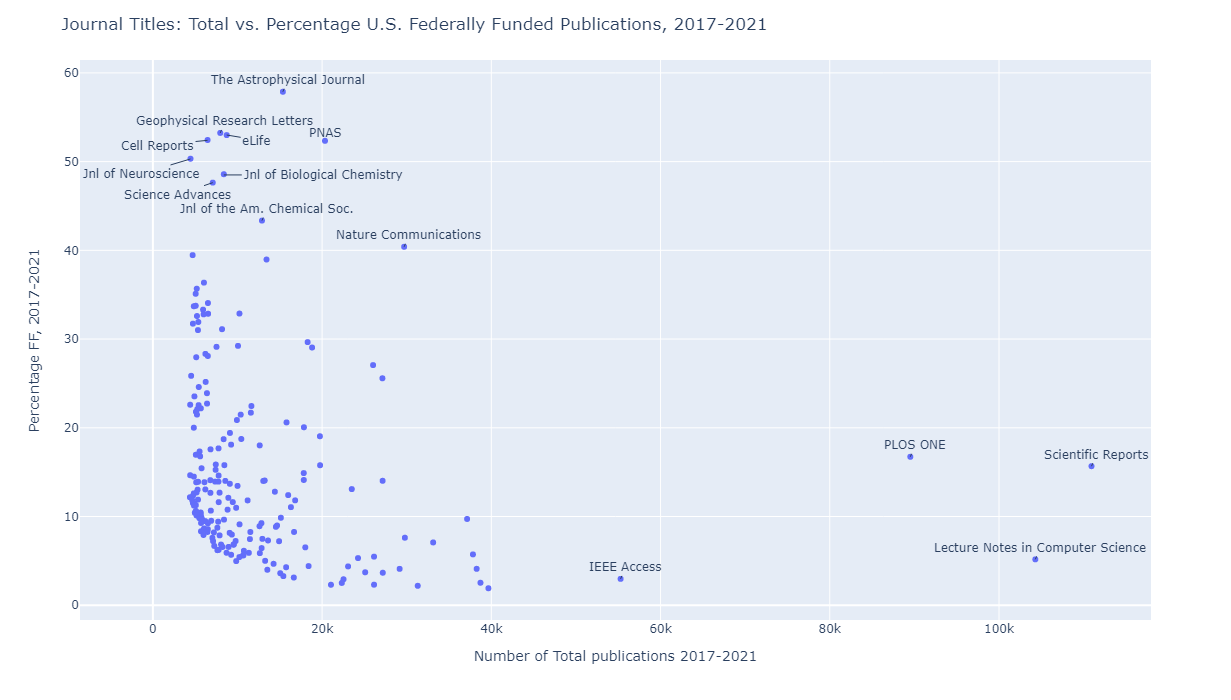

In [93]:
df = pd.read_excel('Journal_titles.xlsx',sheet_name='Journal_titles_FF_pastevalues',header=1)
df = df[df['Worldwide']!=0]

#filt  = df['Rank FF'].between(0,16)
fig = px.scatter(df, x='Worldwide',y='Percentage',# symbol='Name', color='Name',
                 #symbol='Name', 
                 hover_data=['Name'], 
                 log_x=False,
                 #text='Name'
                )

fig.update_traces(textposition='top right')

fig.update_layout(
    height=700, width=1200,
    title_text='Journal Titles: Total vs. Percentage U.S. Federally Funded Publications, 2017-2021',
    xaxis_title = 'Number of Total publications 2017-2021',
    yaxis_title = "Percentage FF, 2017-2021"
)

df2 = df[ (df['Worldwide'] > 55000) | (df['Percentage']>53) | ((df['Percentage']>40) & (df['Percentage']<44)) ]
num_rows = df2.shape[0]
for i in range(num_rows):
    fig.add_annotation(x=df2['Worldwide'].iloc[i],
                       y=df2["Percentage"].iloc[i],
                       text = df2["Name"].iloc[i],
                       #showarrow = True,
                        ax = 5,
                        ay = -12
                      )

# fig.data[0].text = [e if (e=='Nature Communications' or e=='Wiley' or e=='Springer Nature' or e=='IEEE' or e=='SAGE' or e=='CUP'
#                          or e=='ACS' or e=='OUP' or e=='MDPI' or e=='T&F'
#                          or e=='APS' or e=='AGU' or e=='Frontiers' or e=='Soc for Neuroscience' or e=='Am. Assn of Immunologists' or e=='AMS'
#                          )
#                     else '' for e in fig.data[0].text]

fig.add_annotation(x=20344, y=53.3,
            text="PNAS",
            showarrow=False,
            arrowhead=0,)

fig.add_annotation(x=8728, y=53,
            text="eLife",
            showarrow=True,
            arrowhead=0,
                  ax=30,
                  ay=5)

fig.add_annotation(x=6463, y=52.4,
            text="Cell Reports",
            showarrow=True,
            arrowhead=0,
                  ax=-50,
                  ay=5)

fig.add_annotation(x=4447, y=50.3,
            text="Jnl of Neuroscience",
            showarrow=True,
            arrowhead=0,
                  ax=-50,
                  ay=15)

fig.add_annotation(x=8384, y=48.5,
            text="Jnl of Biological Chemistry",
            showarrow=True,
            arrowhead=0,
                  ax=100,
                  ay=0)

fig.add_annotation(x=7077, y=47.63,
            text="Science Advances",
            showarrow=True,
            arrowhead=0,
                  ax=-35,
                  ay=12)



# fig.add_annotation(x=10000, y=45,
#             text="Am Soc for Clinical Investigation",
#             showarrow=False,
#             arrowhead=0,
#                   ax=30,
#                   ay=-30)


fig.show()

# Research Organizations

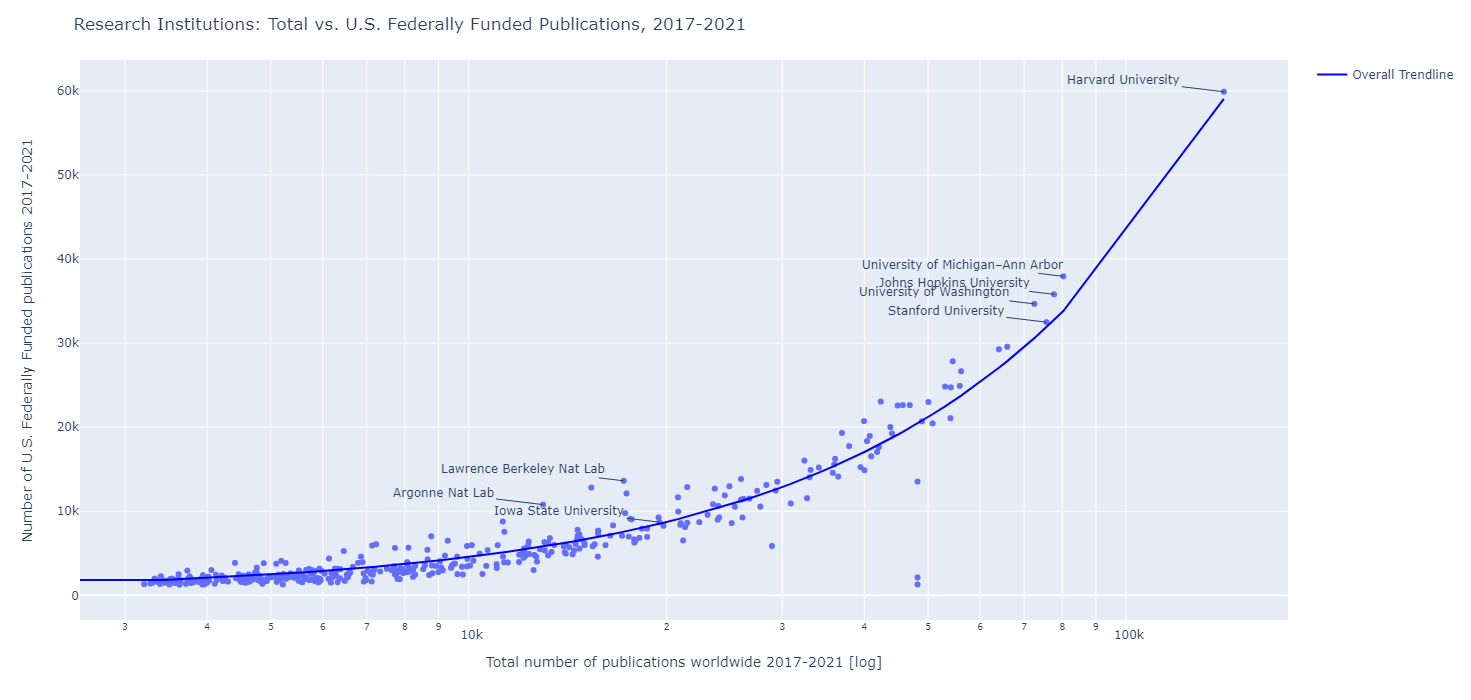

In [222]:
df = pd.read_excel('ResearchOrganizations.xlsx',sheet_name='ResOrg_pastevalues',header=1)

fig = px.scatter(df, x='AllUS',y='FF Pubs',# symbol='Name', color='Name',
                 #symbol='Name',
                 log_x='True', 
                 hover_data=['Name'], 
                 trendline='ols',
                 trendline_scope='overall',
                 trendline_color_override='blue',
                 #text='Name'
                )

fig.update_traces(textposition='top center')

fig.update_layout(
    height=700, width=1200,
    title_text='Research Institutions: Total vs. U.S. Federally Funded Publications, 2017-2021',
    xaxis_title = 'Total number of publications worldwide 2017-2021 [log]',
    yaxis_title = 'Number of U.S. Federally Funded publications 2017-2021'
)


df2 = df[ (df['FF Pubs'] > 30000) | (df['AllUS']>5200000) | (df['Name'].str.contains('Lawrence Berk|Ridge National|Argonne|Iowa State')) ]
num_rows = df2.shape[0]
for i in range(num_rows):
    fig.add_annotation(x=np.log10(df2['AllUS']).iloc[i],
                       y=df2["FF Pubs"].iloc[i],
                       text = df2["Name"].iloc[i],
                       # showarrow = True,
                        ax = -100,
                        ay = -12
                      )
    
# fig.data[0].text = [e if (e=='Elsevier' or e=='Wiley' or e=='Springer Nature' or e=='IEEE' or e=='SAGE' or e=='CUP'
#                          or e=='ACS' or e=='OUP' or e=='MDPI' or e=='T&F'
#                          or e=='APS' or e=='AGU' or e=='Frontiers' or e=='Am. Astronomical Soc.' or e=='De Gruyter'
#                          )
#                     else 1]

# fig.add_annotation(x=4.415, y=7444,
#             text="Physical Review B",
#             showarrow=False,
#             arrowhead=0)
# fig.add_annotation(x=4.433, y=6940,
#             text="The FASEB Journal",
#             showarrow=True,
#             arrowhead=0,
#                   ay=18,
#                   ax=10)
# fig.add_annotation(x=4.11, y=5891,
#             text="Jnl of Am. Chem. Soc.",
#             showarrow=False,
#             arrowhead=0)
# fig.add_annotation(x=4.35, y=4102,
#             text="Physical Review D",
#             showarrow=False,
#             arrowhead=0)
# fig.add_annotation(x=3.9, y=4107,
#             text="Geophysical Research Letters",
#             showarrow=False,
#             arrowhead=0)

fig.show()

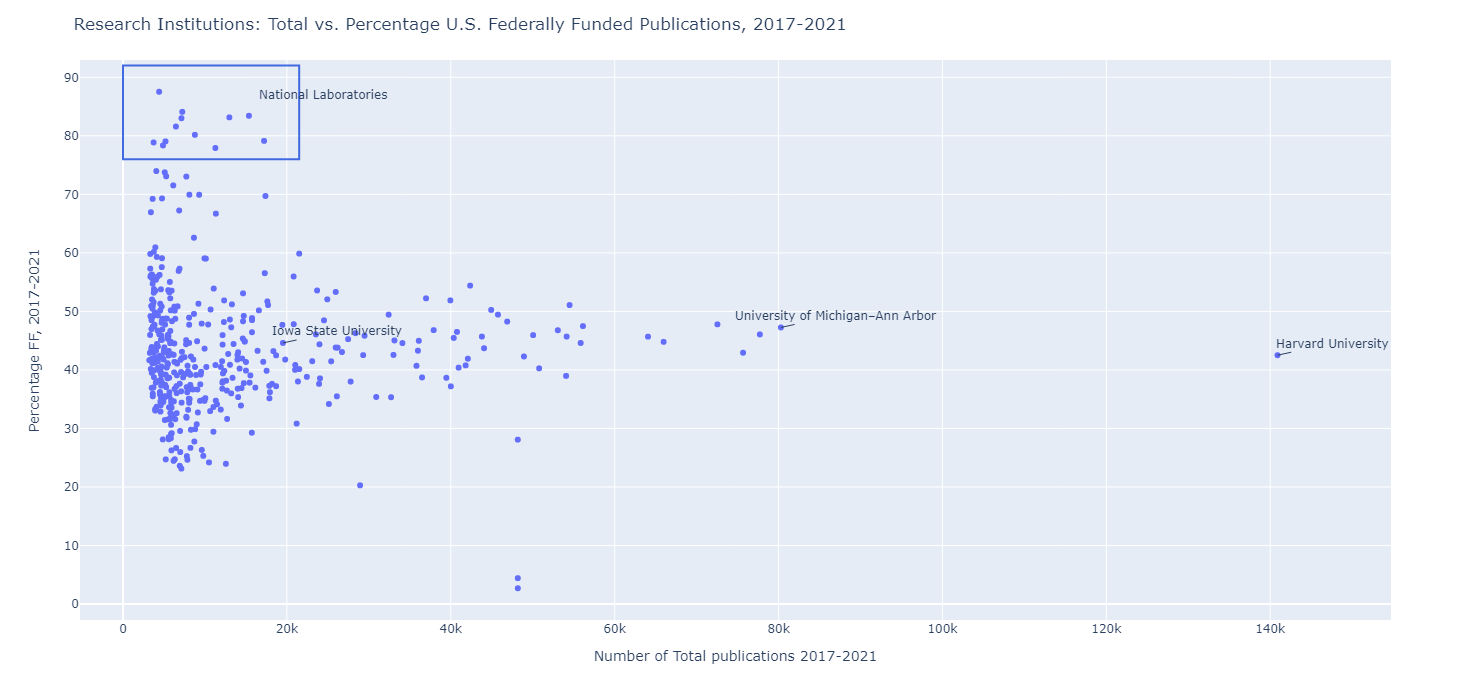

In [ ]:
df = pd.read_excel('ResearchOrganizations.xlsx',sheet_name='ResOrg_pastevalues',header=1)
df = df[df['AllUS']!=0]

#filt  = df['Rank FF'].between(0,16)
fig = px.scatter(df, x='AllUS',y='Percentage',# symbol='Name', color='Name',
                 #symbol='Name', 
                 hover_data=['Name'], 
                 log_x=False,
                 #text='Name'
                )

fig.update_traces(textposition='top right')

fig.update_layout(
    height=700, width=1200,
    title_text='Research Institutions: Total vs. Percentage U.S. Federally Funded Publications, 2017-2021',
    xaxis_title = 'Number of Total publications 2017-2021',
    yaxis_title = "Percentage FF, 2017-2021"
)

df2 = df[ (df['AllUS'] > 80000) | (df['Percentage']>99) | (df['Name'].str.contains('Iowa State|Larence Berk|Ridge Natioal|Argone')) ]
num_rows = df2.shape[0]
for i in range(num_rows):
    fig.add_annotation(x=df2['AllUS'].iloc[i],
                       y=df2["Percentage"].iloc[i],
                       text = df2["Name"].iloc[i],
                       #showarrow = True,
                        ax = 55,
                        ay = -12
                      )

fig.add_shape(type="rect",
    x0=0, y0=76, x1=21500, y1=92,
    line=dict(color="RoyalBlue"),
    #layer="below",
)
    
# fig.data[0].text = [e if (e=='Nature Communications' or e=='Wiley' or e=='Springer Nature' or e=='IEEE' or e=='SAGE' or e=='CUP'
#                          or e=='ACS' or e=='OUP' or e=='MDPI' or e=='T&F'
#                          or e=='APS' or e=='AGU' or e=='Frontiers' or e=='Soc for Neuroscience' or e=='Am. Assn of Immunologists' or e=='AMS'
#                          )
#                     else '' for e in fig.data[0].text]

fig.add_annotation(x=24500, y=87,
            text="National Laboratories",
            showarrow=False,
            arrowhead=0,)

# fig.add_annotation(x=8728, y=53,
#             text="eLife",
#             showarrow=True,
#             arrowhead=0,
#                   ax=30,
#                   ay=5)

# fig.add_annotation(x=6463, y=52.4,
#             text="Cell Reports",
#             showarrow=True,
#             arrowhead=0,
#                   ax=-50,
#                   ay=5)

# fig.add_annotation(x=4447, y=50.3,
#             text="Jnl of Neuroscience",
#             showarrow=True,
#             arrowhead=0,
#                   ax=-50,
#                   ay=15)

# fig.add_annotation(x=8384, y=48.5,
#             text="Jnl of Biological Chemistry",
#             showarrow=True,
#             arrowhead=0,
#                   ax=100,
#                   ay=0)

# fig.add_annotation(x=7077, y=47.63,
#             text="Science Advances",
#             showarrow=True,
#             arrowhead=0,
#                   ax=-35,
#                   ay=12)



# fig.add_annotation(x=10000, y=45,
#             text="Am Soc for Clinical Investigation",
#             showarrow=False,
#             arrowhead=0,
#                   ax=30,
#                   ay=-30)


fig.show()

# Open Access

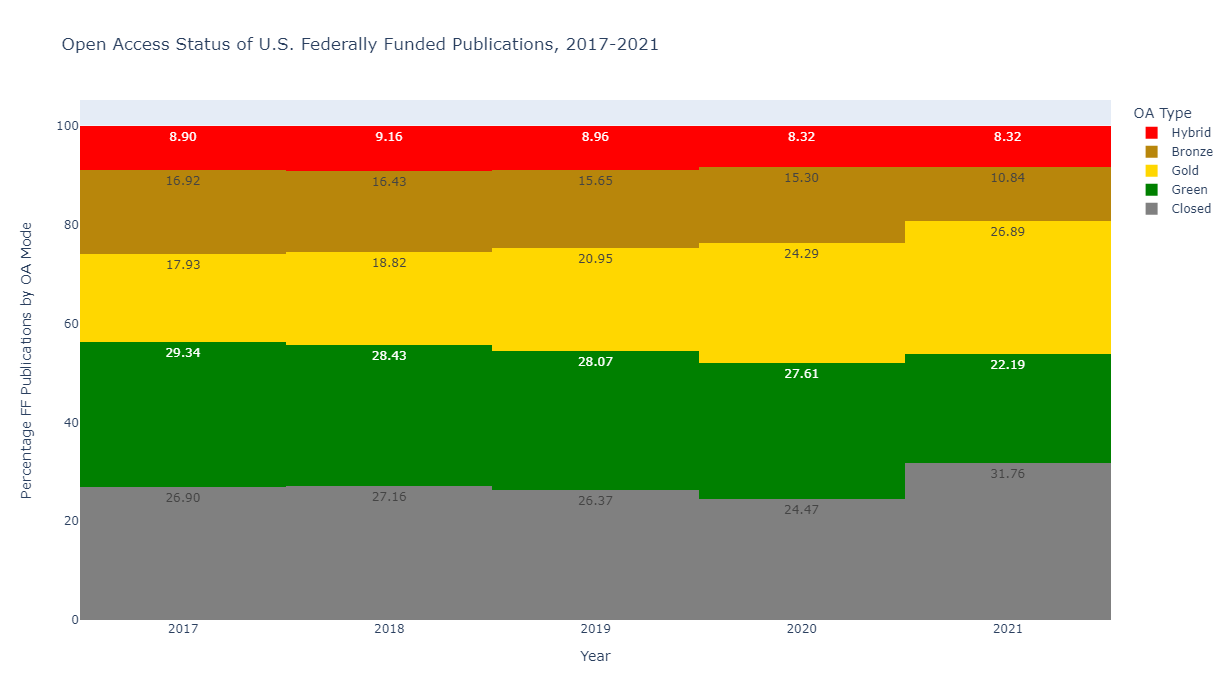

In [195]:
df = pd.read_excel('OA.xlsx',sheet_name='OA_over_time_FF',header=1)

fig = px.histogram(df, x='Year', y='Count', color='Mode',
                  barnorm='percent', text_auto='.2f',
                  color_discrete_sequence=["gray", "green", "gold", "darkgoldenrod", "red"],
                   title='Open Access status of FF publications')

fig.update_layout(
    height=700, width=700,
    title_text='Open Access Status of U.S. Federally Funded Publications, 2017-2021',
    xaxis_title = 'Year',
    yaxis_title = 'Percentage FF Publications by OA Mode',
    legend_traceorder="reversed",
    legend_title_text='OA Type'
)

fig.show()

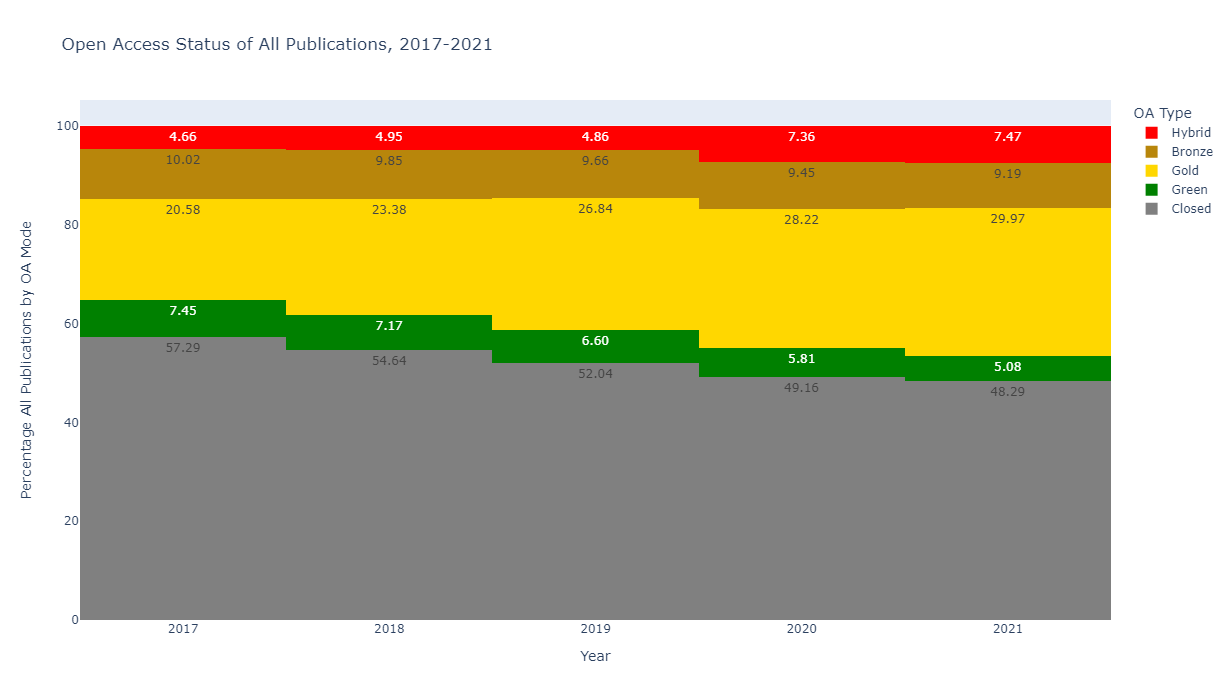

In [198]:
df = pd.read_excel('OA.xlsx',sheet_name='OA_over_time_worldwide',header=0)

fig = px.histogram(df, x='Year', y='Count', color='Mode',
                  barnorm='percent', text_auto='.2f',
                  color_discrete_sequence=["gray", "green", "gold", "darkgoldenrod", "red"],
                   title='Open Access status of FF publications')

fig.update_layout(
    height=700, width=700,
    title_text='Open Access Status of All Publications, 2017-2021',
    xaxis_title = 'Year',
    yaxis_title = 'Percentage All Publications by OA Mode',
    legend_traceorder="reversed",
    legend_title_text='OA Type'
)

fig.show()

# Combining - OA by Publisher

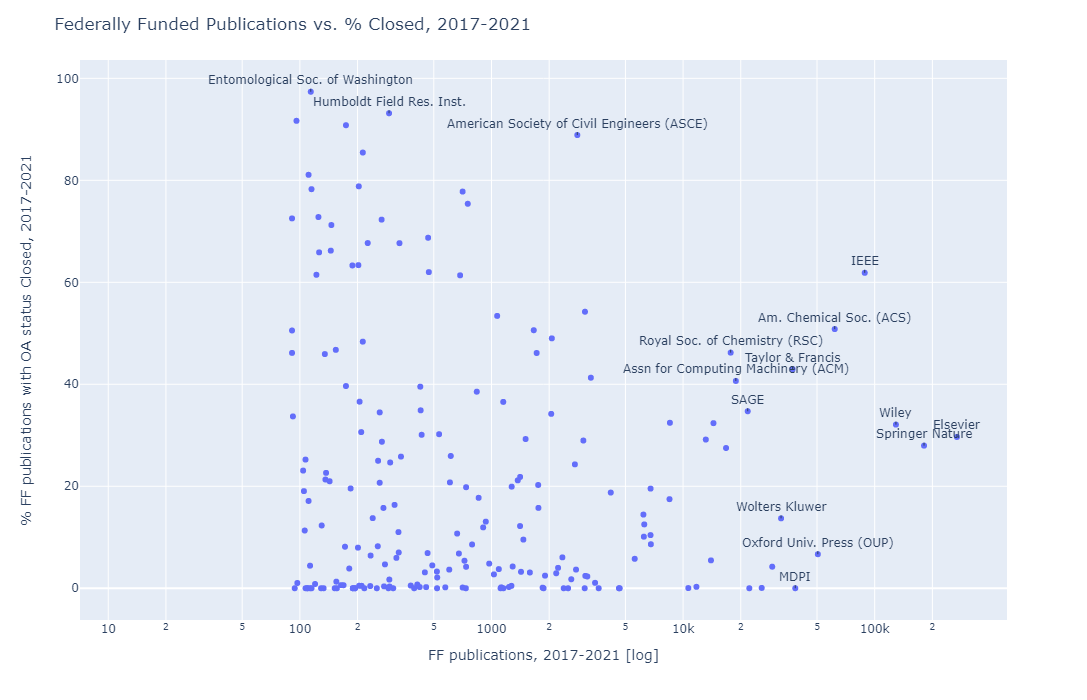

In [221]:
df = pd.read_excel('Publishers.xlsx',sheet_name='Publisher-FF-pastevalues',header=1)

fig = px.scatter(df, x='FF Pubs',y='% OSTP closed',# symbol='Name', color='Name',
                 #symbol='Name',
                 log_x='True', 
                 hover_data=['Name'], 
                 #trendline='ols',
                 #trendline_scope='overall',
                 #trendline_color_override='blue',
                 #text='Name'
                )

fig.update_traces(textposition='top center')

fig.update_layout(
    height=700, width=1200,
    title_text='Federally Funded Publications vs. % Closed, 2017-2021',
    xaxis_title = 'FF publications, 2017-2021 [log]',
    yaxis_title = '% FF publications with OA status Closed, 2017-2021'
)


df2 = df[ (df['FF Pubs'] > 30000) | (df['% OSTP closed']>94) | (df['Name'].str.contains('ASCE|Humboldt|RSC|SAGE|ACM')) ]
num_rows = df2.shape[0]
for i in range(num_rows):
    fig.add_annotation(x=np.log10(df2['FF Pubs']).iloc[i],
                       y=df2["% OSTP closed"].iloc[i],
                       text = df2["Name"].iloc[i],
                       # showarrow = True,
                        ax = 0,
                        ay = -12
                      )
    
# fig.data[0].text = [e if (e=='Elsevier' or e=='Wiley' or e=='Springer Nature' or e=='IEEE' or e=='SAGE' or e=='CUP'
#                          or e=='ACS' or e=='OUP' or e=='MDPI' or e=='T&F'
#                          or e=='APS' or e=='AGU' or e=='Frontiers' or e=='Am. Astronomical Soc.' or e=='De Gruyter'
#                          )
#                     else 1]

# fig.add_annotation(x=4.415, y=7444,
#             text="Physical Review B",
#             showarrow=False,
#             arrowhead=0)
# fig.add_annotation(x=4.433, y=6940,
#             text="The FASEB Journal",
#             showarrow=True,
#             arrowhead=0,
#                   ay=18,
#                   ax=10)
# fig.add_annotation(x=4.11, y=5891,
#             text="Jnl of Am. Chem. Soc.",
#             showarrow=False,
#             arrowhead=0)
# fig.add_annotation(x=4.35, y=4102,
#             text="Physical Review D",
#             showarrow=False,
#             arrowhead=0)
# fig.add_annotation(x=3.9, y=4107,
#             text="Geophysical Research Letters",
#             showarrow=False,
#             arrowhead=0)

fig.show()